In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),  # Input layer
    tf.keras.layers.Dropout(0.1),  # Reduced dropout
    tf.keras.layers.Dense(64, activation='relu'),  # More neurons
    tf.keras.layers.Dropout(0.3),  # Reduced dropout
    tf.keras.layers.Dense(32, activation='relu'),  # More neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,162 (20.16 KB)

 Trainable params: 5,162 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,  # Reduced batch size
    validation_data=(X_test, y_test),
    #callbacks=[cp_callback, es_callback]
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.0179 - loss: 2.5407 - val_accuracy: 0.2333 - val_loss: 2.1955
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2252 - loss: 2.0875 - val_accuracy: 0.2333 - val_loss: 1.8210
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3579 - loss: 1.7244 - val_accuracy: 0.5833 - val_loss: 1.4952
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4700 - loss: 1.4752 - val_accuracy: 0.5889 - val_loss: 1.2825
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5905 - loss: 1.2906 - val_accuracy: 0.8167 - val_loss: 1.0955
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6529 - loss: 1.1507 - val_accuracy: 0.8167 - val_loss: 0.9366
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7061 - loss: 1.0239 - val_accuracy: 0.8167 - val_loss: 0.7837
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7454 - loss: 0.8866 - val_accuracy: 0.8167 - val_loss:

In [16]:
import matplotlib.pyplot as plt


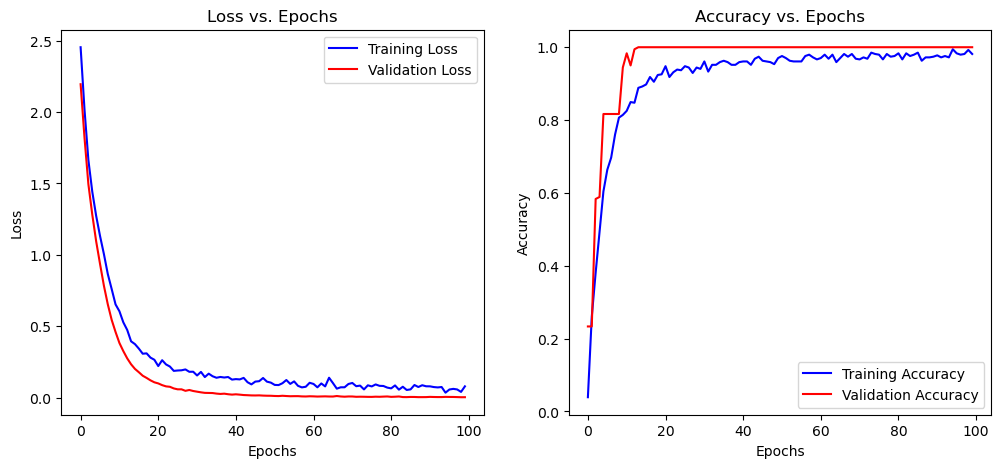

In [13]:
import matplotlib.pyplot as plt

# Extract history data
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(loss))

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()


In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0026


In [29]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [30]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[9.9874496e-01 4.9560872e-06 2.2916646e-07 1.2437721e-03 5.6772574e-08
 5.3643907e-06 2.5977160e-08 4.5919634e-07 2.4840162e-08 2.0870220e-07]
0


# Confusion matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


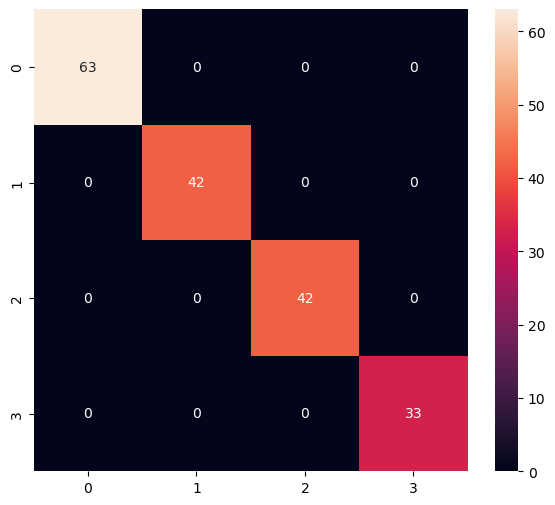

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        33

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Vikas\AppData\Local\Temp\tmpmv7hcuki\assets


INFO:tensorflow:Assets written to: C:\Users\Vikas\AppData\Local\Temp\tmpmv7hcuki\assets


Saved artifact at 'C:\Users\Vikas\AppData\Local\Temp\tmpmv7hcuki'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1775685859472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1775685860048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1775432486160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1775685861008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1775685859280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1775685860816: TensorSpec(shape=(), dtype=tf.resource, name=None)


9728

# Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [28]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

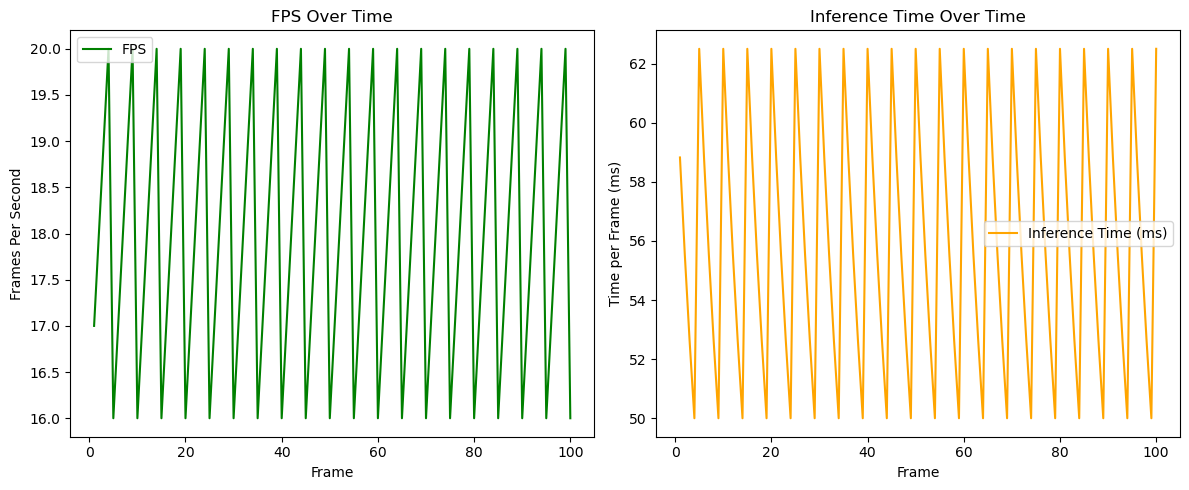

In [31]:
import matplotlib.pyplot as plt

# Sample FPS and time per frame (replace with actual values)
frame_indices = list(range(1, 101))
fps_values = [18 + (i % 5 - 2) for i in frame_indices]
inference_times = [1000 / fps for fps in fps_values]  # in milliseconds

plt.figure(figsize=(12, 5))

# FPS Plot
plt.subplot(1, 2, 1)
plt.plot(frame_indices, fps_values, color='green', label='FPS')
plt.xlabel('Frame')
plt.ylabel('Frames Per Second')
plt.title('FPS Over Time')
plt.legend()

# Inference Time Plot
plt.subplot(1, 2, 2)
plt.plot(frame_indices, inference_times, color='orange', label='Inference Time (ms)')
plt.xlabel('Frame')
plt.ylabel('Time per Frame (ms)')
plt.title('Inference Time Over Time')
plt.legend()

plt.tight_layout()
plt.show()
